## Utilities
<br>
This notebook has the objective of displaying some of the utilities that have been used
in the project, in particular how the graph representing each sentence is built 
and how it can be visualized. <br> <br>
It is important to note that the dataset that has to be fed to our GNNs 
is an extension of the Dataset class from torch_geometric, here a temporary one is 
created and displayed.

In [2]:
import utils

2023-08-21 16:31:21 INFO: Downloading default packages for language: en (English) ...
2023-08-21 16:31:23 INFO: File exists: C:\Users\giova\stanza_resources\en\default.zip
2023-08-21 16:31:28 INFO: Finished downloading models and saved to C:\Users\giova\stanza_resources.
2023-08-21 16:31:28 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-08-21 16:31:30 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| constituency | wsj       |
| depparse     | combined  |
| sentiment    | sstplus   |
| ner          | ontonotes |

2023-08-21 16:31:30 INFO: Using device: cuda
2023-08-21 16:31:30 INFO: Loading: tokenize
2023-08-21 16:31:32 INFO: Loading: pos
2023-08-21 16:31:33 INFO: Loading: lemma
2023-08-21 16:31:33 INFO: Loading: constituency
2023-08-21 16:31:33 INFO: Loading: depparse
2023-08-21 16:31:34 INFO: Loading: sentiment
2023-08-21 16:31:34 INFO: Loading: ner
2023-08-21 16:31:35 INFO: Done loading processors!


Utils have been correctly loaded


In [5]:
utils.print_example("""This is an example needed to understand how the dependency parser, 
              from the Stanza library, works. Two separate sentences are parsed.""")

id: 1	word: This		head id: 4
id: 2	word: is		head id: 4
id: 3	word: an		head id: 4
id: 4	word: example		head id: 0
id: 5	word: needed		head id: 4
id: 6	word: to		head id: 7
id: 7	word: understand	head id: 5
id: 8	word: how		head id: 18
id: 9	word: the		head id: 11
id: 10	word: dependency	head id: 11
id: 11	word: parser		head id: 18
id: 12	word: ,			head id: 11
id: 13	word: from		head id: 16
id: 14	word: the		head id: 16
id: 15	word: Stanza		head id: 16
id: 16	word: library		head id: 11
id: 17	word: ,			head id: 11
id: 18	word: works		head id: 7
id: 19	word: .			head id: 4
id: 1	word: Two		head id: 3
id: 2	word: separate		head id: 3
id: 3	word: sentences		head id: 5
id: 4	word: are		head id: 5
id: 5	word: parsed		head id: 0
id: 6	word: .			head id: 5


In [6]:
returned_dict = utils.get_tokens_and_dependencies("""My babe don't stand no cheating, 
                                            of course she will believe me. 
                                            Oh yes, she don't stand no cheating""", 
                                            positional_links = True)
print(returned_dict["0 tokens"])
print(returned_dict["0 dependency"])
print(returned_dict["1 tokens"])
print(returned_dict["1 dependency"])

['My' 'babe' 'do' "n't" 'stand' 'no' 'cheating' ',' 'of' 'course' 'she'
 'will' 'believe' 'me' '.']
[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  1  2  2  3  3  4  4  5  5
   6  6  7  7  8  8  9  9 10 10 11 11 12 12 13 13 14 14 15]
 [ 2  5  5  5  0  7  5  5 13  9 13 13  5 13  5  2  1  3  2  4  3  5  4  6
   5  7  6  8  7  9  8 10  9 11 10 12 11 13 12 14 13 15 14]]
['Oh' 'yes' ',' 'she' 'do' "n't" 'stand' 'no' 'cheating']
[[17 18 19 20 21 22 23 24 25 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24
  25]
 [23 23 18 23 23 23 16 25 23 18 17 19 18 20 19 21 20 22 21 23 22 24 23 25
  24]]


In [7]:
merged = utils.get_forest_from_sentence("""My babe don't stand no cheating, 
                                            of course she will believe me. 
                                            Oh yes, she don't stand no cheating""")
print(merged)

{'tokens': ['My', 'babe', 'do', "n't", 'stand', 'no', 'cheating', ',', 'of', 'course', 'she', 'will', 'believe', 'me', '.', 'Oh', 'yes', ',', 'she', 'do', "n't", 'stand', 'no', 'cheating'], 'dependency': array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1,
         2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9,
        10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23,
        23, 24, 24, 25],
       [ 2,  5,  5,  5,  0,  7,  5,  5, 13,  9, 13, 13,  5, 13,  5,  2,
         1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8, 10,
         9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 23, 23, 18, 23, 23,
        23, 16, 25, 23, 18, 17, 19, 18, 20, 19, 21, 20, 22, 21, 23, 22,
        24, 23, 25, 24]]), 'first_nodes': [0, 16]}


In [3]:
from nltk.tokenize import word_tokenize
sentence = "I love natural language processing"
tokens = word_tokenize(sentence)
embeddings = utils.g_utils.embed_to_GloVe(tokens, pca_flag = True)
print("Example of projection through PCA of the embeddings of four words in a 3 dimensional space:")
print(utils.g_utils.project_tokens(["Antonio", "Pasquale", "Luigi", "The"]))
print("Number of elements in the vocabulary of the GloVe utils object:")
print(len(utils.g_utils.vocabulary.keys()))
print("Projections are needed to associate a color to each embedding")

Example of projection through PCA of the embeddings of four words in a 3 dimensional space:
[[0.51726058 0.19998938 0.81824906]
 [0.47331833 0.14197088 0.82439026]
 [0.53227085 0.17409419 0.77563818]
 [0.53544492 0.1735321  0.78347435]]
Number of elements in the vocabulary of the GloVe utils object:
9
Projections are needed to associate a color to each embedding


['content/temp//temp.pt']
Graphs representing sentences are stored as:
Data(x=[4, 50], edge_index=[2, 7], y=[1], batch=[4])
Data(x=[4, 50], edge_index=[2, 7], y=[1], batch=[4])
The graph representation is visualized as follows:


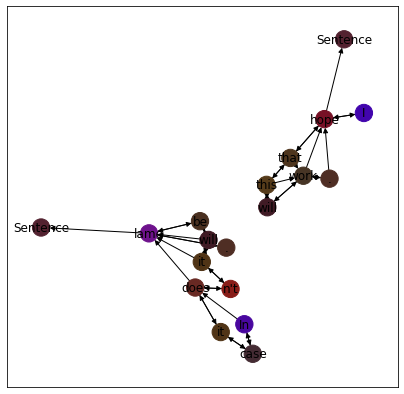

In order to visualize values output of the hidden graph layers, 
we can project the values in the original 3 dimensional space, since we already did PCA.
This visualization is useful to check how the features are smoothed across neighbours:


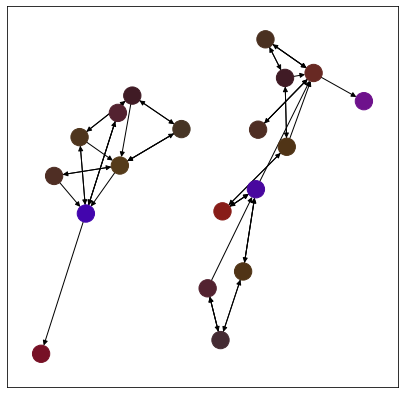

In [6]:
sentences_list = ["I love NLP", "Graphs are neat"]
target_values = [0, 1]
temp_dataset = utils.Dataset_from_sentences("temp", "content/temp/","content/drive/MyDrive/temp/", 
                                           sentences_list, target_values)
print("Graphs representing sentences are stored as:")
print(temp_dataset[0])
print(temp_dataset[1])
temp_glove_graph, td_dict = temp_dataset.__build_graph_Data_with_GloVe__("""I hope that this will work. 
                                                           In case it doesn't it will be lame.""", 0, True)
print("The graph representation is visualized as follows:")
utils.visualize_graph(temp_glove_graph, td_dict)
x_features = temp_glove_graph.x
links = temp_glove_graph.edge_index
print("""In order to visualize values output of the hidden graph layers, 
we can project the values in the original 3 dimensional space, since we already did PCA.
This visualization is useful to check how the features are smoothed across neighbours:""")
utils.visualize_hidden_graph(x_features, links, k_custom = float(0.6))